In [20]:
from math import floor
from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np

%load_ext blackcellmagic

The blackcellmagic extension is already loaded. To reload it, use:
  %reload_ext blackcellmagic


In [28]:
def binary_search(sorted_list: List[int], item: int) -> Tuple[int, int]:
    """Determines index location of given item in a sorted list.

        Parameters
        ----------
        sorted_list: List[int]
            Pre-sorted list of integers that search
            will be performed on.
        item: int
            Number to search for in the list.

        Returns
        -------
        Tuple[int, int]
            Tuple containing index of item and steps
            required during search.
    """
    low: int = 0
    high: int = len(sorted_list) - 1
    steps: int = 0
    while low <= high:
        mid: int = floor((low + high) / 2)
        guess: int = sorted_list[mid]
        if guess == item:
            steps += 1
            return mid, steps
        elif guess > item:
            steps += 1
            high = mid - 1
        else:
            steps += 1
            low = mid + 1
    return None, None


def simple_search(sorted_list: List[int], item: int) -> Tuple[int, int]:
    start = 0
    steps = 0
    while sorted_list[start] <= item:
        guess = sorted_list[start]
        if guess == item:
            steps += 1
            return start, steps
        else:
            steps += 1
            start += 1
    return None, None

In [34]:
sl_100k = [i for i in range(1, 100001)]

item_index, steps = binary_search(sl_100k, 70000)

print("List length = {}".format(len(sl_100k)))
print("Item index = {}".format(item_index))
print("Total steps = {}".format(steps))

List length = 100000
Item index = 69999
Total steps = 16


In [25]:
%%timeit
binary_search(sl_100k, 70000)

4.43 µs ± 36.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [30]:
%%timeit
simple_search(sl_100k, 70000)

10.1 ms ± 286 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


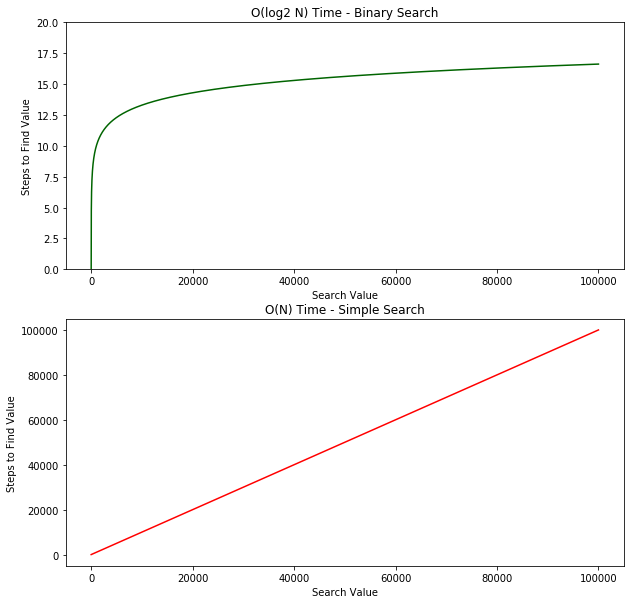

In [47]:
fig, ax = plt.subplots(figsize=(10, 10), nrows=2, ncols=1)

ax[0].plot(np.log2(np.array(sl_100k)), color="darkgreen")
ax[0].set_ylim(0, 20)
ax[0].set_title("O(log2 N) Time - Binary Search")
ax[0].set_ylabel("Steps to Find Value")
ax[0].set_xlabel("Search Value")

ax[1].plot(np.array(sl_100k), color="red")
ax[1].set_title("O(N) Time - Simple Search")
ax[1].set_ylabel("Steps to Find Value")
ax[1].set_xlabel("Search Value")

plt.show()